In [2]:
import pandas as pd

file_path = 'Electric Vehicle Population in USA.csv'
data = pd.read_csv(file_path)

data.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,E.V_Type,CAFV,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,PHEV,known,42.0,0.0,35.0,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,BEV,known,151.0,0.0,35.0,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,BEV,known,266.0,0.0,43.0,113120017,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014,NISSAN,LEAF,BEV,known,84.0,0.0,46.0,108188713,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017,CHEVROLET,BOLT EV,BEV,known,238.0,0.0,20.0,176448940,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10


In [4]:
key_columns = ['Electric Range', 'Base MSRP', 'Model Year']
missing_summary = data[key_columns].isnull().sum()
zero_values_summary = (data[key_columns] == 0).sum()

data_cleaned = data.copy()
data_cleaned[key_columns] = data_cleaned[key_columns].replace(0, pd.NA)

missing_summary, zero_values_summary


(Electric Range    8
 Base MSRP         8
 Model Year        0
 dtype: int64,
 Electric Range    114172
 Base MSRP         202114
 Model Year             0
 dtype: int64)

In [6]:
for col in key_columns:
    data_cleaned[col] = data_cleaned[col].replace(0, pd.NA)

missing_summary_cleaned = data_cleaned[key_columns].isnull().sum()
missing_summary_cleaned


Electric Range    114180
Base MSRP         202122
Model Year             0
dtype: int64

In [8]:
data_cleaned['Electric Range'] = data_cleaned['Electric Range'].replace(0, pd.NA)

data_cleaned['Electric Range'].isnull().sum()


np.int64(114180)

In [10]:
unique_values_electric_range = data['Electric Range'].unique()
unique_values_electric_range


array([ 42., 151., 266.,  84., 238., 291.,  31.,   0.,  76.,  93.,  53.,
        16.,  75.,  32., 249., 215.,  35.,  97., 239.,  83., 208., 107.,
        34.,  17., 220.,  40.,  25.,  22.,  13.,  73.,  87., 259., 210.,
        26.,  30., 322.,  38., 200., 293., 150., 126.,  81., 110., 114.,
        19.,  21.,  48., 203., 153., 308.,  72., 234.,  14.,  37.,  20.,
        28.,  39.,  18.,  47., 258.,  33., 192., 330.,   8.,  82., 270.,
         6.,  29., 337., 204.,  58.,  23., 125., 170., 222., 289.,  24.,
       111.,  41.,  12., 233.,  15., 149.,  27.,  10.,  62., 124., 265.,
       245.,  36.,  11.,  68.,  56.,  55., 218., 103.,  46.,  59., 100.,
         9.,  nan,  95.,  51.,  57.,  74.,  43.])

In [12]:
data_cleaned['Valid Electric Range'] = data['Electric Range'].where(data['Electric Range'] > 0, pd.NA)

data_cleaned['Valid Electric Range'].describe()


count    91259.000000
mean       117.425931
std         98.990022
min          6.000000
25%         30.000000
50%         75.000000
75%        215.000000
max        337.000000
Name: Valid Electric Range, dtype: float64

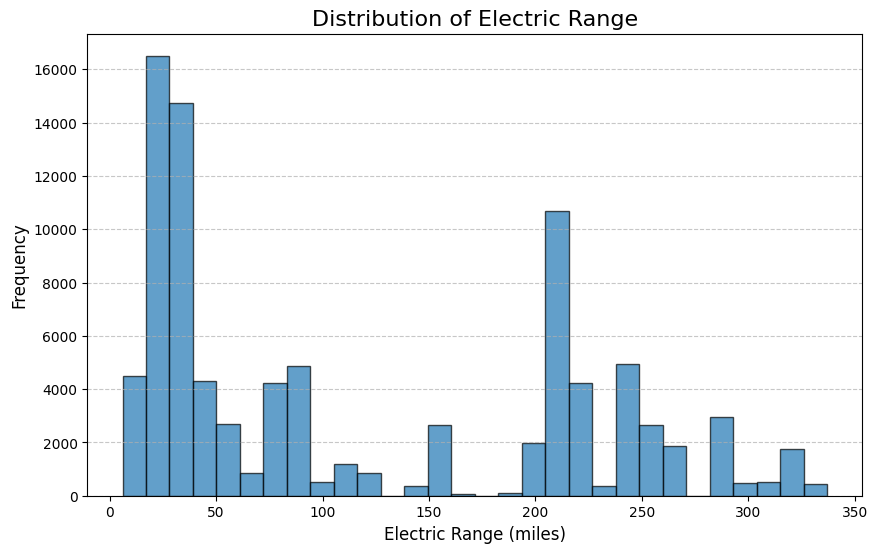

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
data_cleaned['Valid Electric Range'].dropna().plot(kind='hist', bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Electric Range', fontsize=16)
plt.xlabel('Electric Range (miles)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


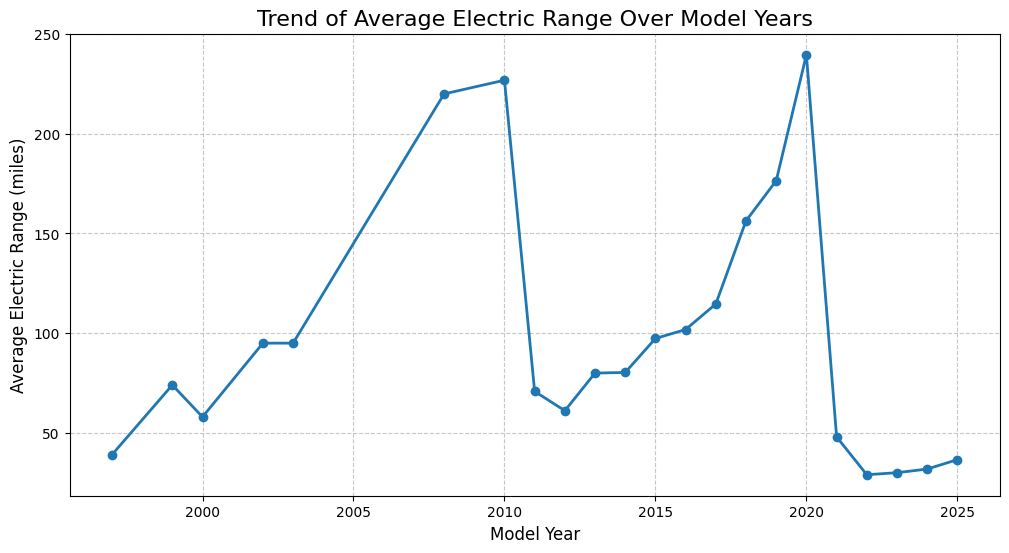

In [18]:
trend_data = data_cleaned.groupby('Model Year')['Valid Electric Range'].mean().dropna()

plt.figure(figsize=(12, 6))
trend_data.plot(kind='line', marker='o', linewidth=2)
plt.title('Trend of Average Electric Range Over Model Years', fontsize=16)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Average Electric Range (miles)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


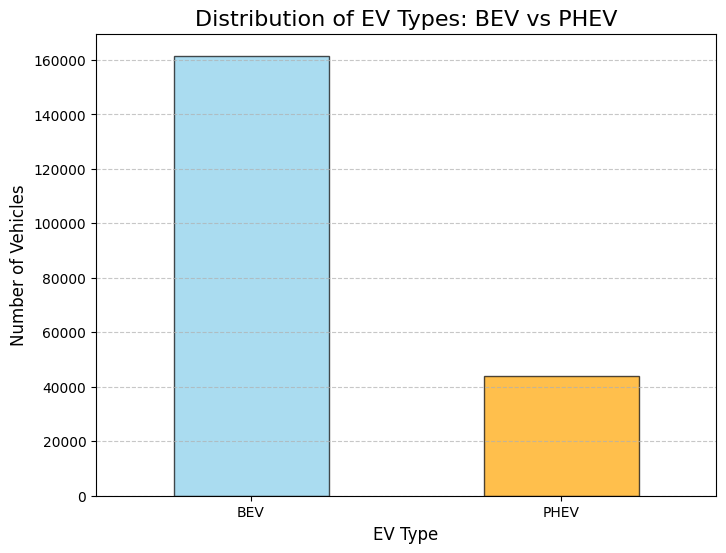

E.V_Type
BEV     161539
PHEV     43900
Name: count, dtype: int64

In [20]:
ev_type_counts = data_cleaned['E.V_Type'].value_counts()

plt.figure(figsize=(8, 6))
ev_type_counts.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black', alpha=0.7)
plt.title('Distribution of EV Types: BEV vs PHEV', fontsize=16)
plt.xlabel('EV Type', fontsize=12)
plt.ylabel('Number of Vehicles', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

ev_type_counts


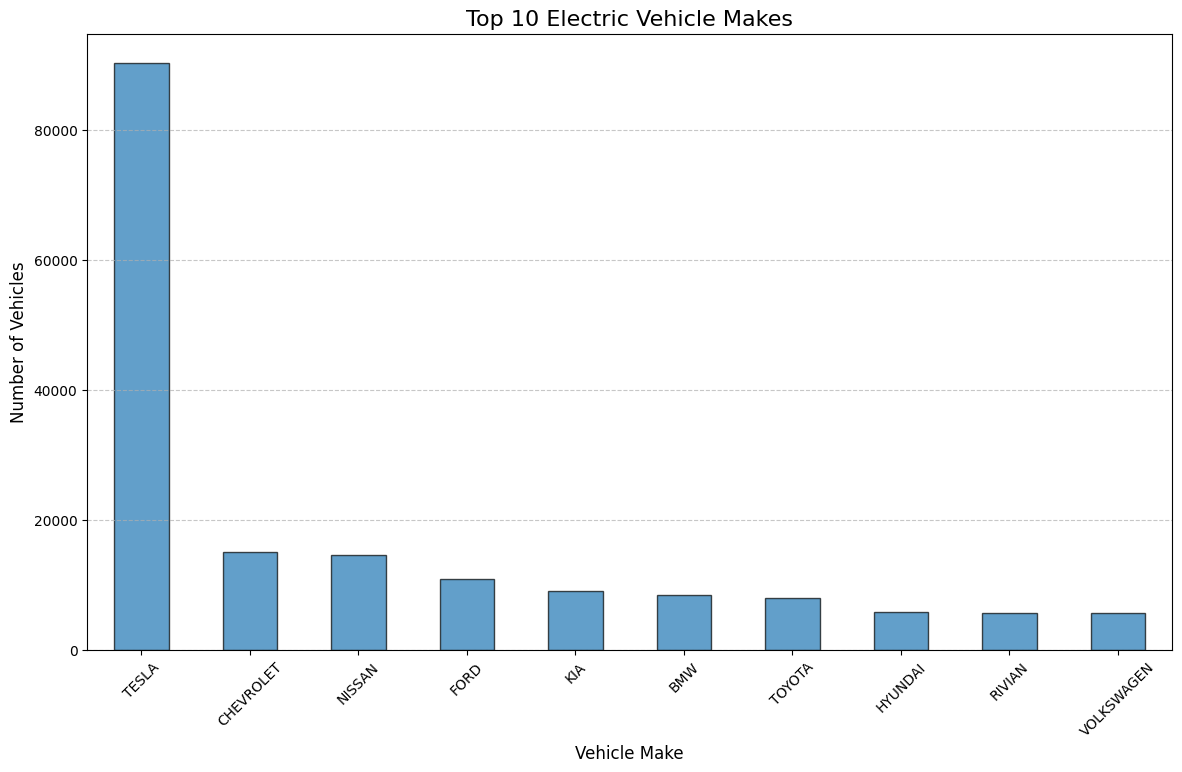

Make
TESLA         90318
CHEVROLET     15114
NISSAN        14525
FORD          10840
KIA            9104
BMW            8481
TOYOTA         7945
HYUNDAI        5782
RIVIAN         5679
VOLKSWAGEN     5638
Name: count, dtype: int64

In [22]:
make_distribution = data_cleaned['Make'].value_counts()

plt.figure(figsize=(14, 8))
make_distribution.head(10).plot(kind='bar', edgecolor='black', alpha=0.7)
plt.title('Top 10 Electric Vehicle Makes', fontsize=16)
plt.xlabel('Vehicle Make', fontsize=12)
plt.ylabel('Number of Vehicles', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

make_distribution.head(10)


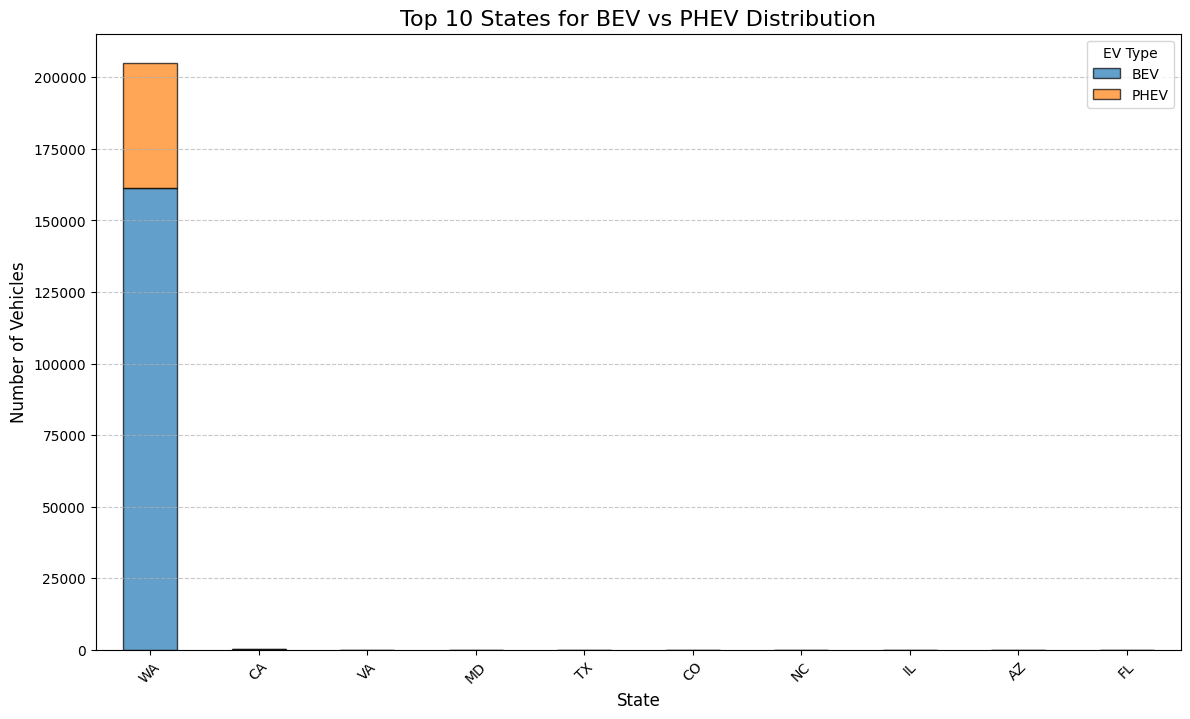

,BEV,PHEV,Total
State,,,
WA,161222,43775,204997
CA,88,28,116
VA,40,18,58
MD,21,11,32
TX,19,7,26
CO,12,5,17
NC,12,4,16
IL,11,2,13
AZ,10,3,13


In [24]:
bev_data = data_cleaned[data_cleaned['E.V_Type'] == 'BEV']
phev_data = data_cleaned[data_cleaned['E.V_Type'] == 'PHEV']

bev_by_state = bev_data.groupby('State')['VIN (1-10)'].count()
phev_by_state = phev_data.groupby('State')['VIN (1-10)'].count()

bev_phev_by_state = pd.DataFrame({
    'BEV': bev_by_state,
    'PHEV': phev_by_state
}).fillna(0).astype(int)

bev_phev_by_state['Total'] = bev_phev_by_state['BEV'] + bev_phev_by_state['PHEV']
bev_phev_by_state = bev_phev_by_state.sort_values(by='Total', ascending=False)

bev_phev_by_state_top10 = bev_phev_by_state.head(10)
bev_phev_by_state_top10[['BEV', 'PHEV']].plot(kind='bar', stacked=True, figsize=(14, 8), alpha=0.7, edgecolor='black')
plt.title('Top 10 States for BEV vs PHEV Distribution', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Vehicles', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='EV Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

bev_phev_by_state_top10


<Figure size 1200x600 with 0 Axes>

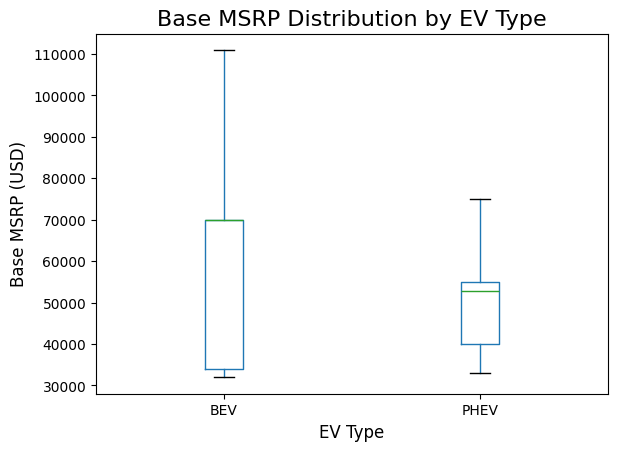

,count,unique,top,freq
E.V_Type,,,,
BEV,2109.0,8.0,69900.0,1359.0
PHEV,1208.0,22.0,52900.0,220.0


In [26]:
data_cleaned['Valid MSRP'] = data_cleaned['Base MSRP'].where(data_cleaned['Base MSRP'] > 0, pd.NA)

price_stats = data_cleaned.groupby('E.V_Type')['Valid MSRP'].describe()

plt.figure(figsize=(12, 6))
data_cleaned.boxplot(column='Valid MSRP', by='E.V_Type', grid=False, showfliers=False)
plt.title('Base MSRP Distribution by EV Type', fontsize=16)
plt.suptitle('')  
plt.xlabel('EV Type', fontsize=12)
plt.ylabel('Base MSRP (USD)', fontsize=12)
plt.show()

price_stats


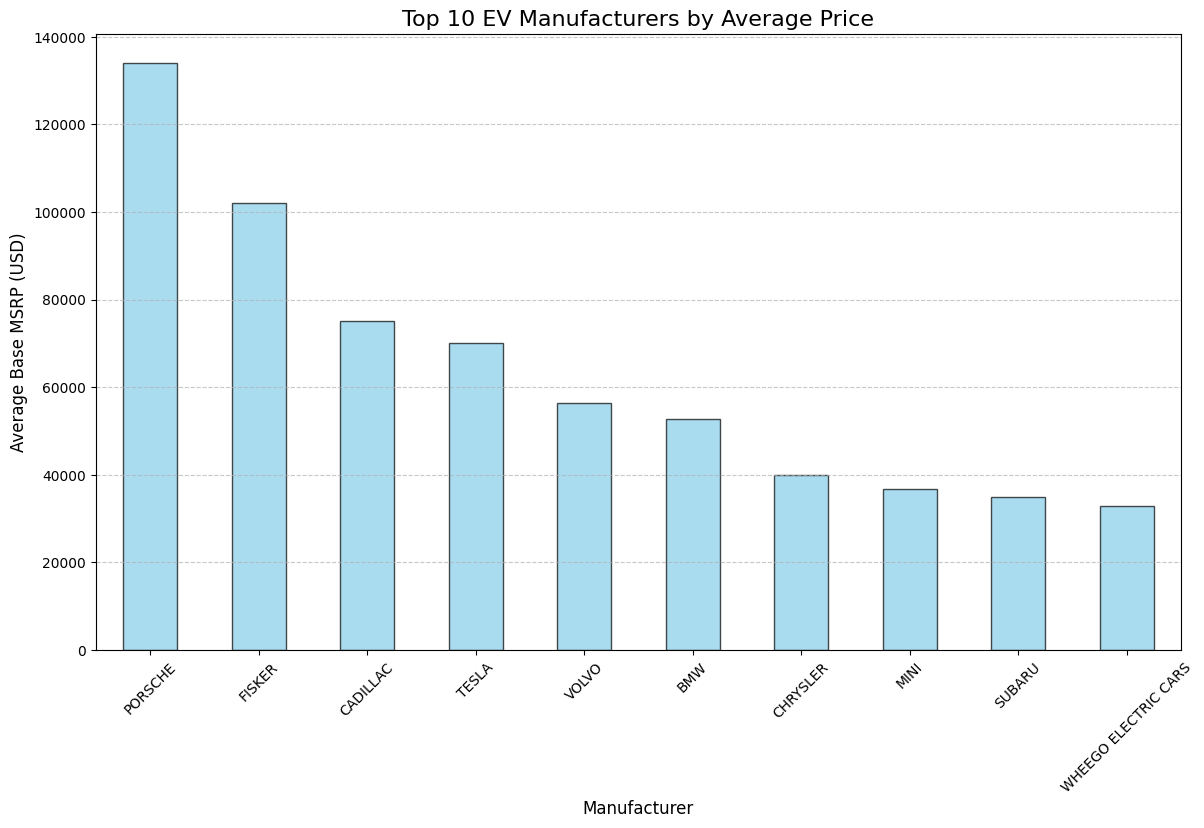

Make
PORSCHE                     133950.0
FISKER                      102000.0
CADILLAC                     75095.0
TESLA                   70177.980456
VOLVO                   56286.601307
BMW                     52720.948617
CHRYSLER                     39995.0
MINI                    36866.451613
SUBARU                       34995.0
WHEEGO ELECTRIC CARS         32995.0
Name: Valid MSRP, dtype: object

In [35]:
# Recompute price statistics by manufacturer
price_by_manufacturer = data_cleaned.groupby('Make')['Valid MSRP'].mean().dropna().sort_values(ascending=False)

# Select the top 10 manufacturers by average price
top_10_manufacturers_mean = price_by_manufacturer.head(10)

# Plot the average price for the top 10 manufacturers
plt.figure(figsize=(14, 8))
top_10_manufacturers_mean.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Top 10 EV Manufacturers by Average Price', fontsize=16)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Average Base MSRP (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display the top 10 manufacturers with their mean prices
top_10_manufacturers_mean


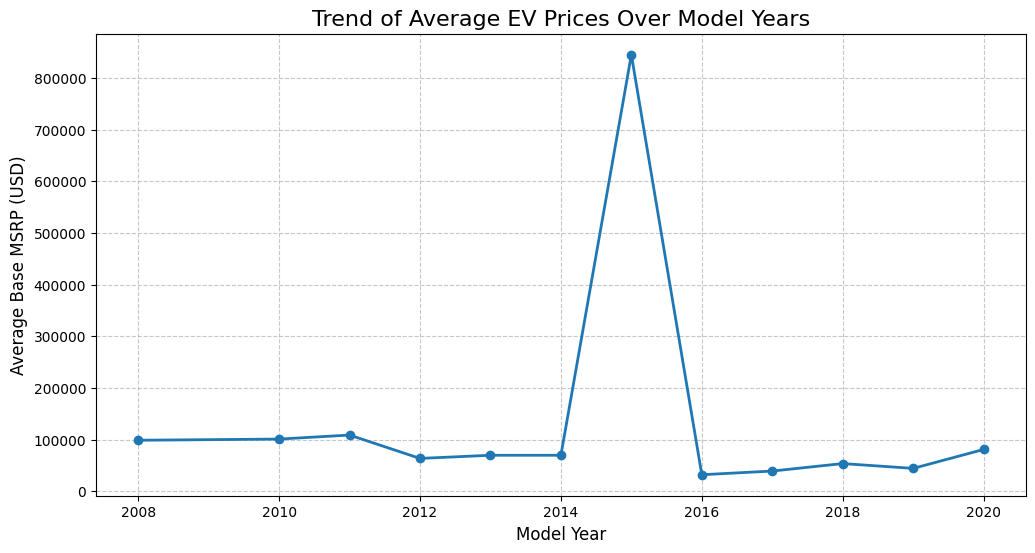

Model Year
2008         98950.0
2010      101205.625
2011        109000.0
2012    63781.560284
2013         69900.0
2014         69900.0
2015        845000.0
2016    32232.754011
2017    39332.600806
2018    53818.197227
2019    44477.919321
2020         81100.0
Name: Valid MSRP, dtype: object

In [37]:
price_trends = data_cleaned.groupby('Model Year')['Valid MSRP'].mean().dropna()

plt.figure(figsize=(12, 6))
price_trends.plot(kind='line', marker='o', linewidth=2)
plt.title('Trend of Average EV Prices Over Model Years', fontsize=16)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Average Base MSRP (USD)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

price_trends


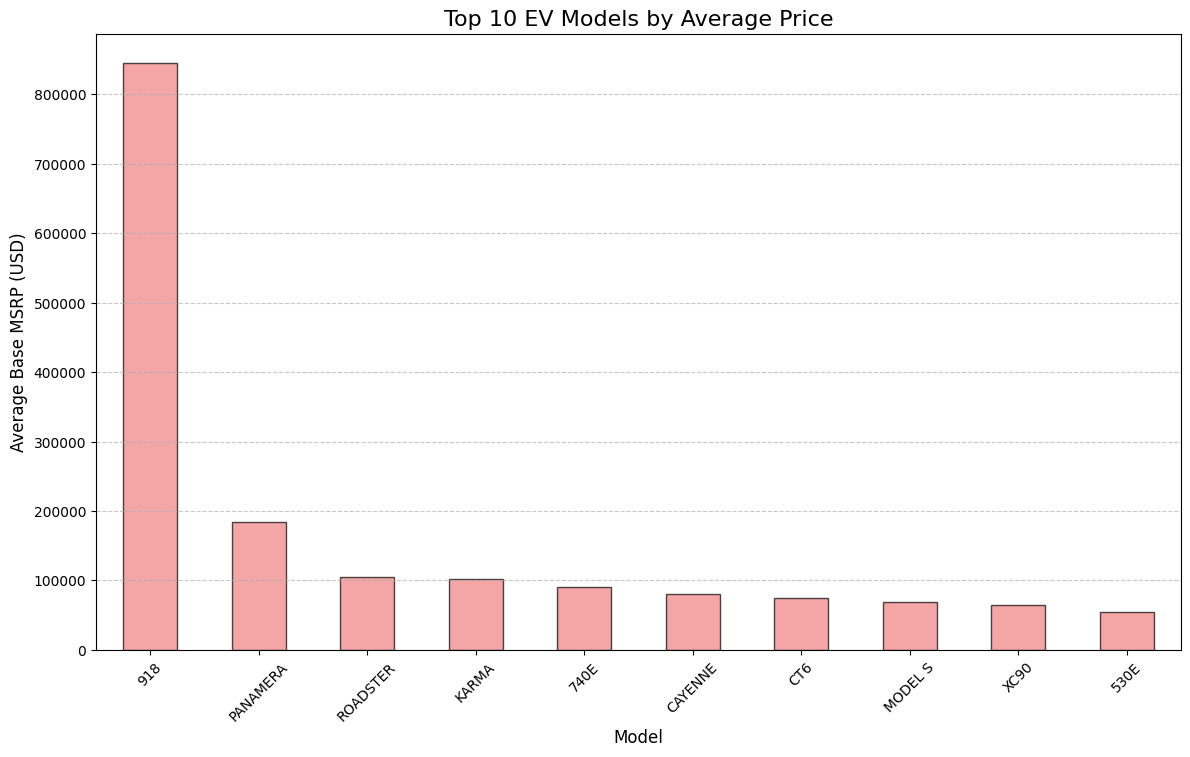

Model
918             845000.0
PANAMERA        184400.0
ROADSTER       105456.25
KARMA           102000.0
740E        90321.428571
CAYENNE          81100.0
CT6              75095.0
MODEL S     69039.206456
XC90             64950.0
530E        54307.958478
Name: Valid MSRP, dtype: object

In [39]:
model_price_trends = data_cleaned.groupby('Model')['Valid MSRP'].mean().dropna().sort_values(ascending=False)

top_10_models_by_price = model_price_trends.head(10)

plt.figure(figsize=(14, 8))
top_10_models_by_price.plot(kind='bar', color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Top 10 EV Models by Average Price', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Average Base MSRP (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

top_10_models_by_price


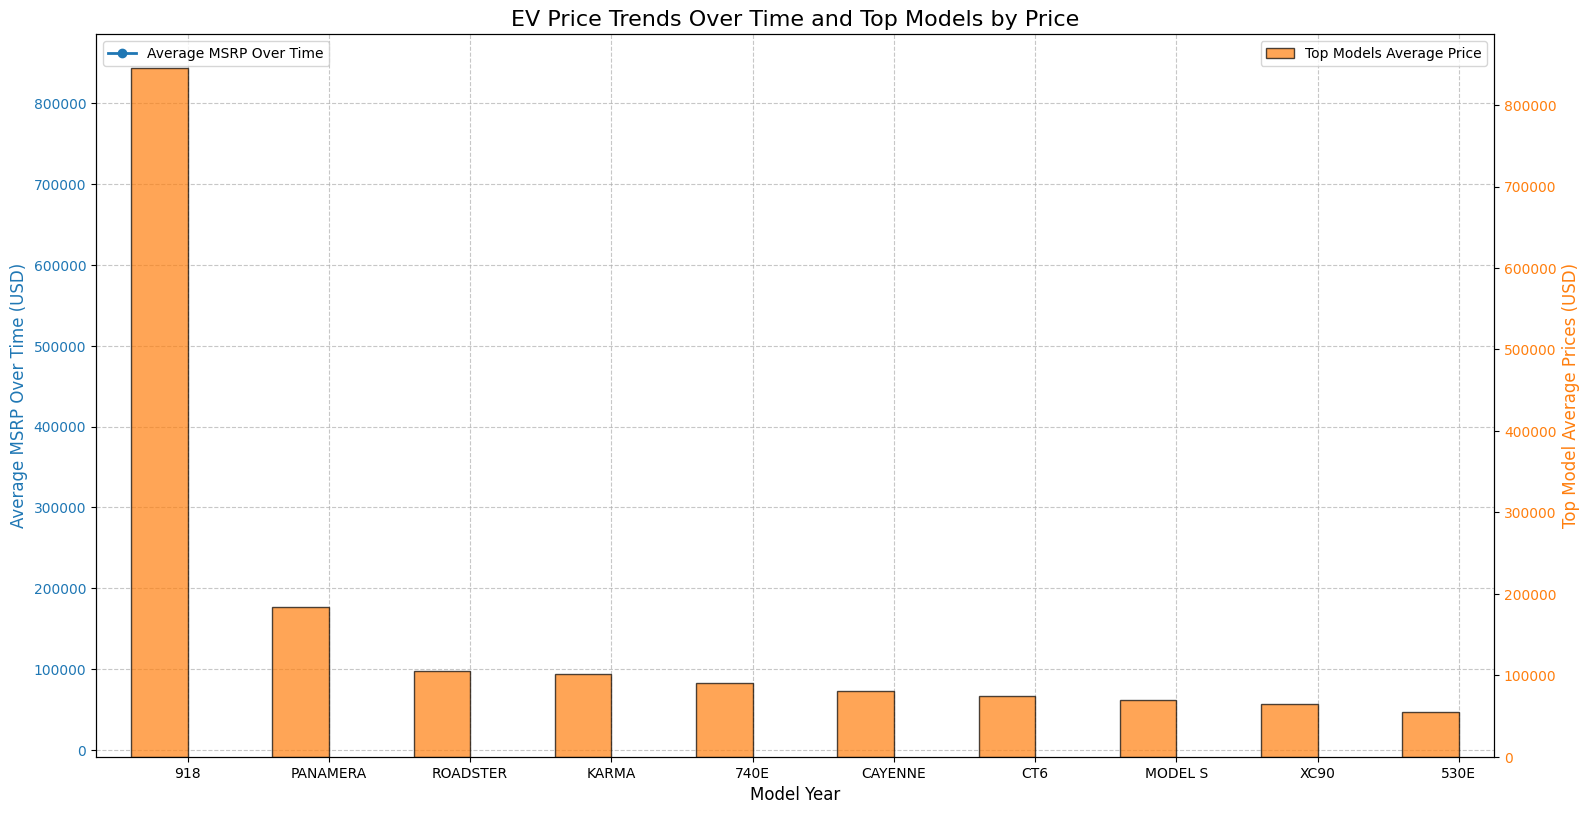

In [41]:
price_trends = data_cleaned.groupby('Model Year')['Valid MSRP'].mean().dropna()

fig, ax1 = plt.subplots(figsize=(16, 8))

color = 'tab:blue'
ax1.set_xlabel('Model Year', fontsize=12)
ax1.set_ylabel('Average MSRP Over Time (USD)', color=color, fontsize=12)
ax1.plot(price_trends.index, price_trends.values, marker='o', color=color, label='Average MSRP Over Time', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(axis='both', linestyle='--', alpha=0.7)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Top Model Average Prices (USD)', color=color, fontsize=12)
top_10_models_by_price.plot(kind='bar', ax=ax2, color=color, alpha=0.7, edgecolor='black', position=1, width=0.4)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(['Top Models Average Price'], loc='upper right')

fig.tight_layout()
plt.title('EV Price Trends Over Time and Top Models by Price', fontsize=16)
plt.show()


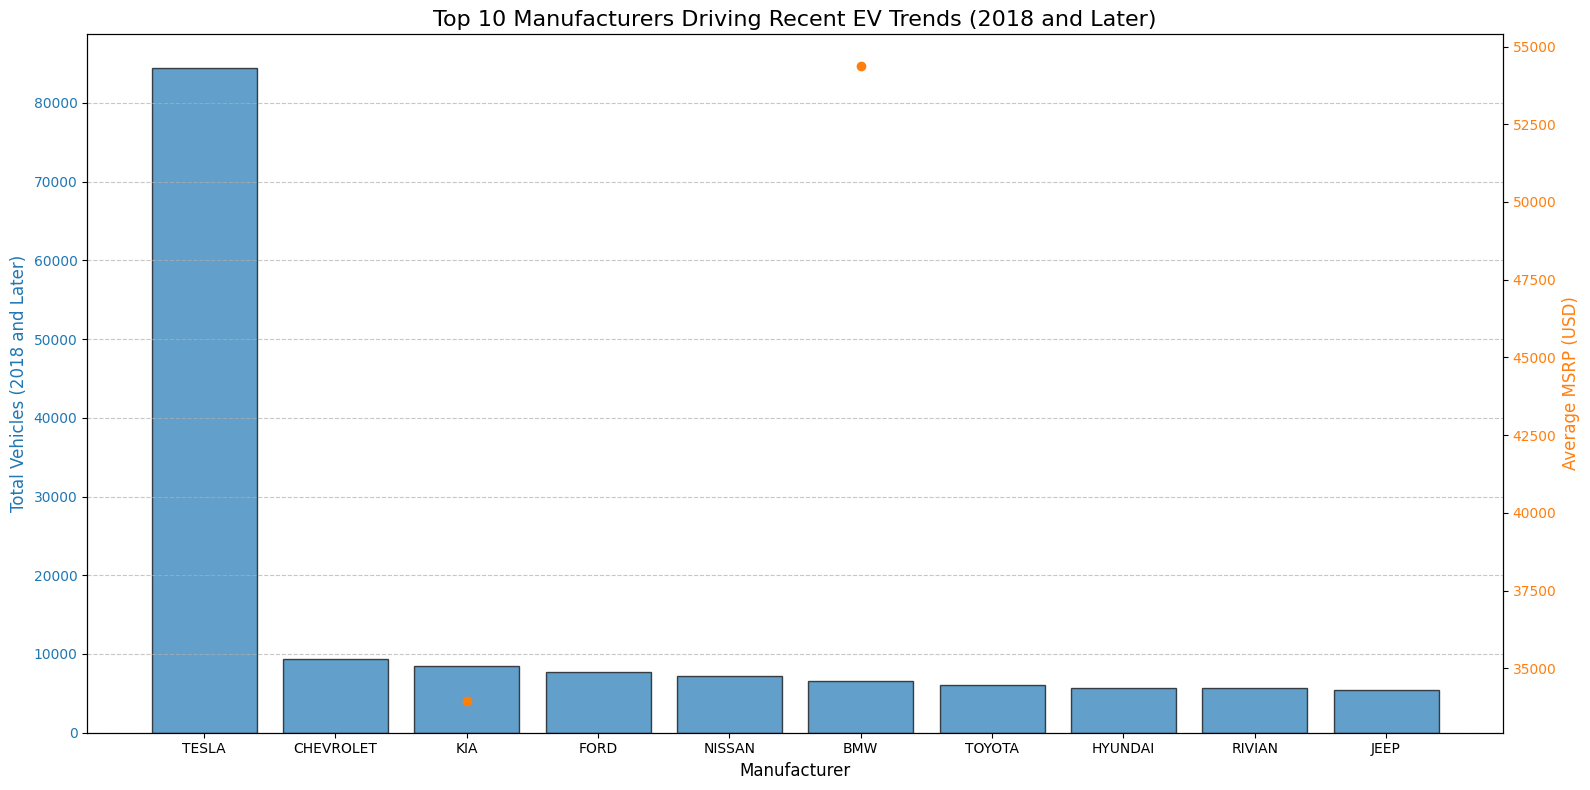

,Total_Vehicles,Average_MSRP
Make,,
TESLA,84482,NaN
CHEVROLET,9417,NaN
KIA,8527,33950.0
FORD,7746,NaN
NISSAN,7186,NaN
BMW,6607,54371.282051
TOYOTA,6038,NaN
HYUNDAI,5696,NaN
RIVIAN,5679,NaN


In [44]:
recent_ev_data = data_cleaned[data_cleaned['Model Year'] >= 2018]

recent_manufacturer_trends = recent_ev_data.groupby('Make').agg(
    Total_Vehicles=('VIN (1-10)', 'count'),
    Average_MSRP=('Valid MSRP', 'mean')
).sort_values(by='Total_Vehicles', ascending=False)

top_recent_manufacturers = recent_manufacturer_trends.head(10)

fig, ax1 = plt.subplots(figsize=(16, 8))

color = 'tab:blue'
ax1.bar(top_recent_manufacturers.index, top_recent_manufacturers['Total_Vehicles'], color=color, alpha=0.7, edgecolor='black')
ax1.set_xlabel('Manufacturer', fontsize=12)
ax1.set_ylabel('Total Vehicles (2018 and Later)', color=color, fontsize=12)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.plot(top_recent_manufacturers.index, top_recent_manufacturers['Average_MSRP'], marker='o', color=color, linewidth=2, label='Average MSRP')
ax2.set_ylabel('Average MSRP (USD)', color=color, fontsize=12)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Top 10 Manufacturers Driving Recent EV Trends (2018 and Later)', fontsize=16)
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()

top_recent_manufacturers
